# 2.1 Plotting 2D Data

Many datasets contain **paired measurements** - two variables measured together. Understanding the relationship between these variables requires specialized visualization techniques.

This chapter covers:
- Plotting categorical 2D data
- Time series visualization
- Spatial data and scatter plots
- Exposing relationships between variables

## 2.1.1 Categorical Data, Counts, and Charts

When both variables are categorical, we need to show how combinations of categories occur.

### Contingency Tables

A **contingency table** (or cross-tabulation) shows frequencies for combinations of two categorical variables.

#### Example: Gender and Goals

From the Chase and Danner study:

| | Sports | Grades | Popular | **Total** |
|---------|--------|--------|---------|-------|
| **Boy** | 117 | 60 | 60 | 237 |
| **Girl** | 23 | 130 | 88 | 241 |
| **Total** | 140 | 190 | 148 | 478 |

**Observations**:
- More boys choose sports (117 vs 23)
- More girls choose grades (130 vs 60)
- The variables appear related!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create contingency table
data = {
    'Sports': [117, 23],
    'Grades': [60, 130],
    'Popular': [60, 88]
}
df = pd.DataFrame(data, index=['Boy', 'Girl'])

print("Contingency Table:")
print(df)
print(f"\nTotal: {df.sum().sum()}")

Contingency Table:
      Sports  Grades  Popular
Boy      117      60       60
Girl      23     130       88

Total: 478


### Stacked Bar Charts

**Stacked bar charts** show how one categorical variable is distributed across another.

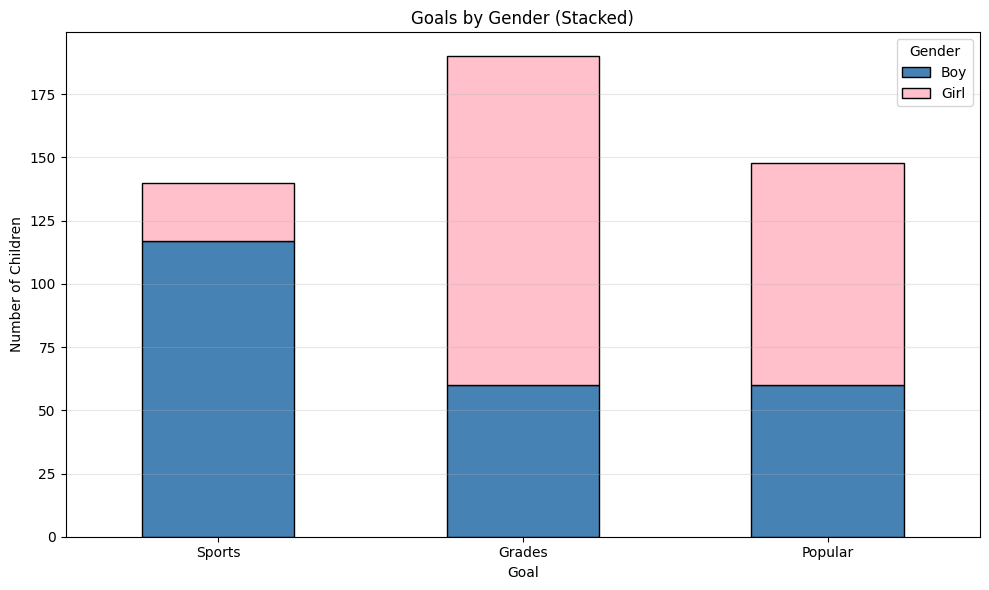

In [2]:
# Stacked bar chart
df.T.plot(kind='bar', stacked=True, figsize=(10, 6), 
          color=['steelblue', 'pink'], edgecolor='black')
plt.xlabel('Goal')
plt.ylabel('Number of Children')
plt.title('Goals by Gender (Stacked)')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

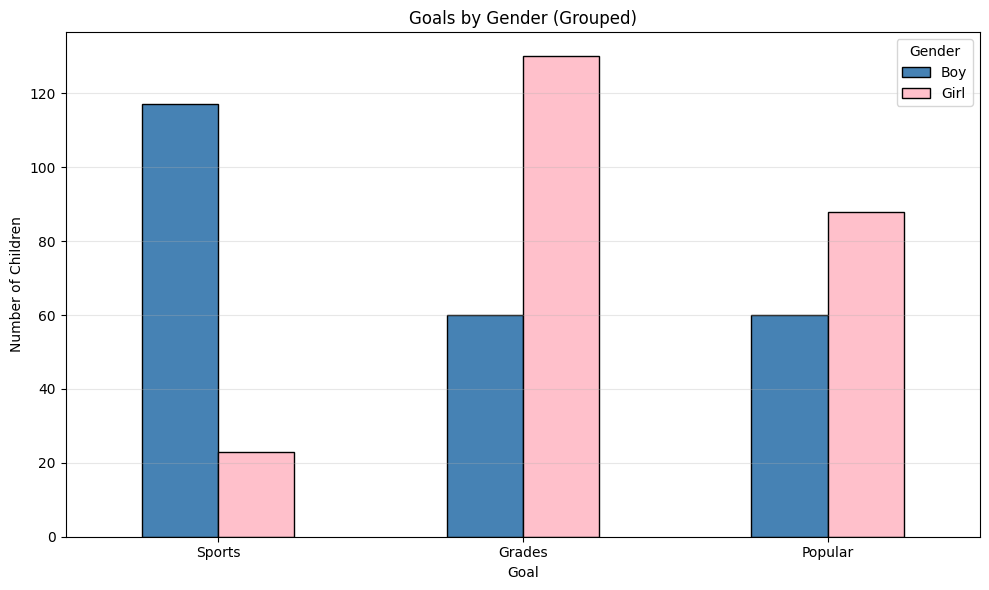

In [3]:
# Grouped bar chart
df.T.plot(kind='bar', figsize=(10, 6), 
          color=['steelblue', 'pink'], edgecolor='black')
plt.xlabel('Goal')
plt.ylabel('Number of Children')
plt.title('Goals by Gender (Grouped)')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

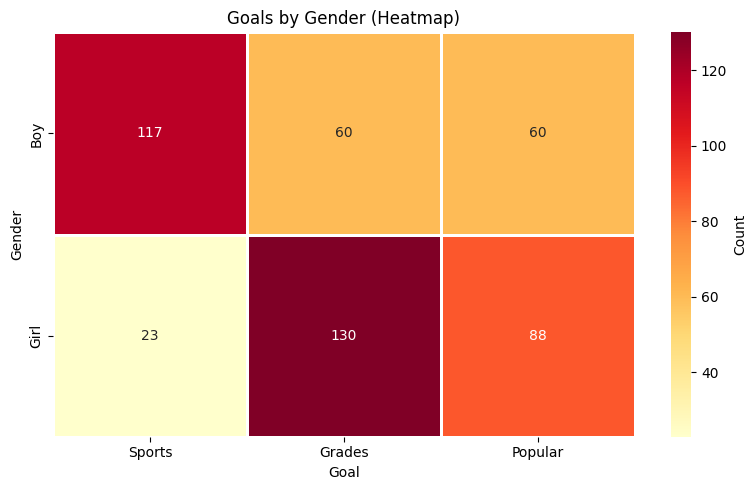

In [4]:
# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Count'}, linewidths=1)
plt.xlabel('Goal')
plt.ylabel('Gender')
plt.title('Goals by Gender (Heatmap)')
plt.tight_layout()
plt.show()

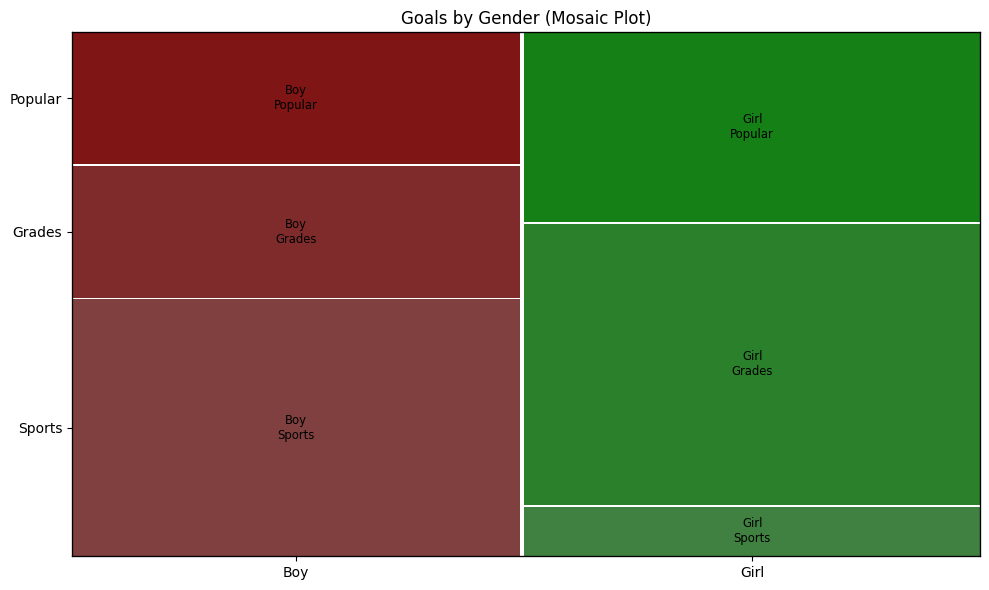

In [8]:
from statsmodels.graphics.mosaicplot import mosaic

# Prepare data for mosaic plot
data_dict = {}
for gender in ['Boy', 'Girl']:
    for goal in ['Sports', 'Grades', 'Popular']:
        count = df.loc[gender, goal]
        data_dict[(gender, goal)] = count

# Create mosaic plot
fig, ax = plt.subplots(figsize=(10, 6))
mosaic(data_dict, ax=ax, title='Goals by Gender (Mosaic Plot)')
plt.tight_layout()
plt.show()

Temperature range: -1.3°C to 29.2°C
Mean temperature: 15.0°C
Summer peak (day 180): 16.7°C
Winter low (day 0): 16.0°C


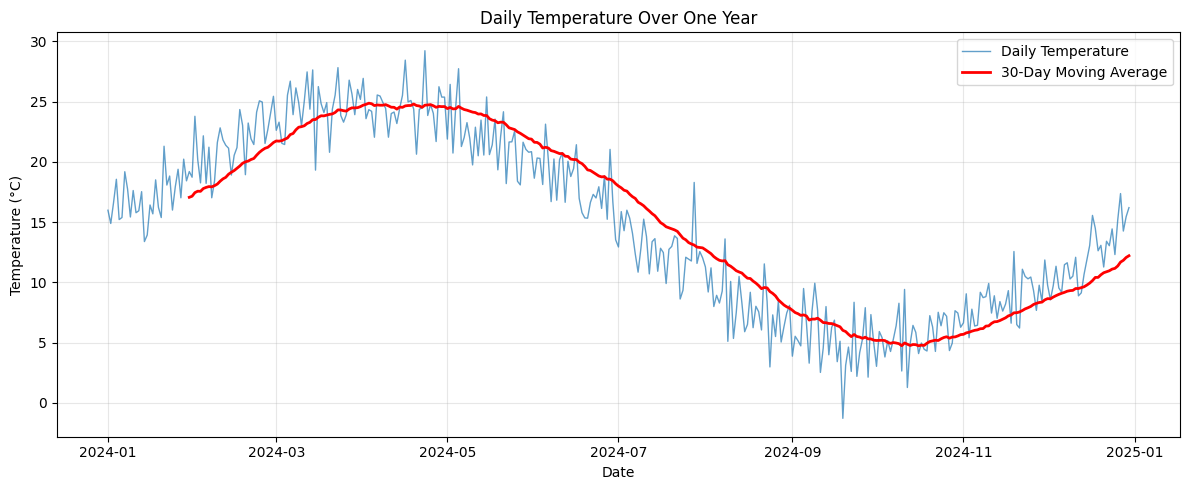

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Simulated temperature data
np.random.seed(42)
dates = pd.date_range('2024-01-01', periods=365, freq='D')

# Temperature with seasonal pattern
day_of_year = np.arange(365)
temperature = 15 + 10 * np.sin(2 * np.pi * day_of_year / 365) + \
              np.random.normal(0, 2, 365)

# Create DataFrame
df_temp = pd.DataFrame({'Date': dates, 'Temperature': temperature})

print(f"Temperature range: {temperature.min():.1f}°C to {temperature.max():.1f}°C")
print(f"Mean temperature: {temperature.mean():.1f}°C")
print(f"Summer peak (day 180): {temperature[180]:.1f}°C")
print(f"Winter low (day 0): {temperature[0]:.1f}°C")

# Line plot
plt.figure(figsize=(12, 5))
plt.plot(df_temp['Date'], df_temp['Temperature'], 
         linewidth=1, alpha=0.7, label='Daily Temperature')

# Add smoothed trend
window = 30
df_temp['Smoothed'] = df_temp['Temperature'].rolling(window=window).mean()
plt.plot(df_temp['Date'], df_temp['Smoothed'], 
         linewidth=2, color='red', label=f'{window}-Day Moving Average')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature Over One Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Series A: Mean = 43.6, Std = 4.6
Series B: Mean = 56.0, Std = 2.6
Series C: Mean = 51.1, Std = 2.5


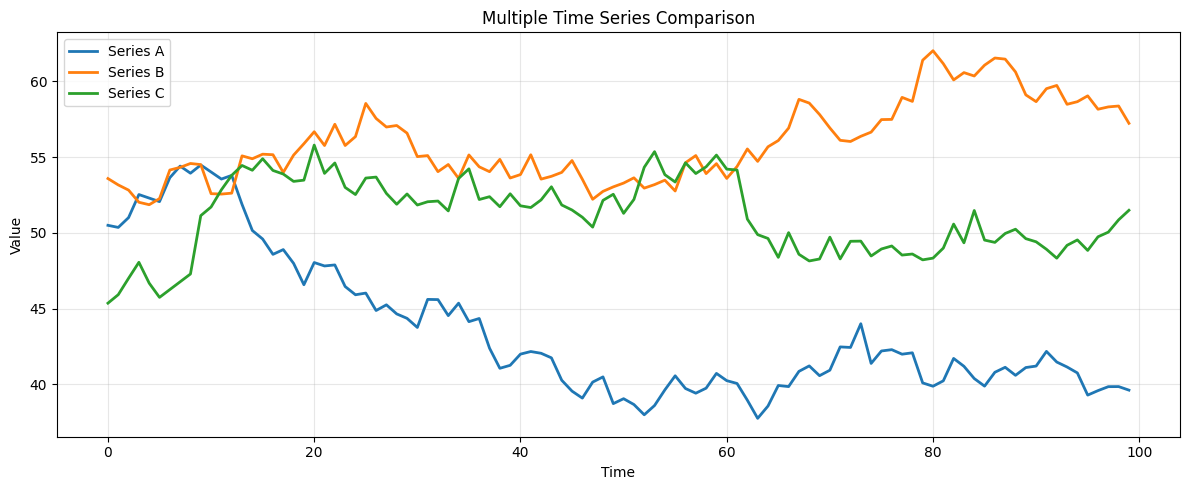

In [10]:
# Multiple series example
np.random.seed(42)
times = np.arange(100)

series1 = np.cumsum(np.random.randn(100)) + 50
series2 = np.cumsum(np.random.randn(100)) + 55
series3 = np.cumsum(np.random.randn(100)) + 45

print(f"Series A: Mean = {series1.mean():.1f}, Std = {series1.std():.1f}")
print(f"Series B: Mean = {series2.mean():.1f}, Std = {series2.std():.1f}")
print(f"Series C: Mean = {series3.mean():.1f}, Std = {series3.std():.1f}")

plt.figure(figsize=(12, 5))
plt.plot(times, series1, label='Series A', linewidth=2)
plt.plot(times, series2, label='Series B', linewidth=2)
plt.plot(times, series3, label='Series C', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Multiple Time Series Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Original: Mean = 59.17, Std = 8.90
Trend: Increases from 50.34 to 67.28
Seasonality: Range = 20.53
Residual: Std = 1.79


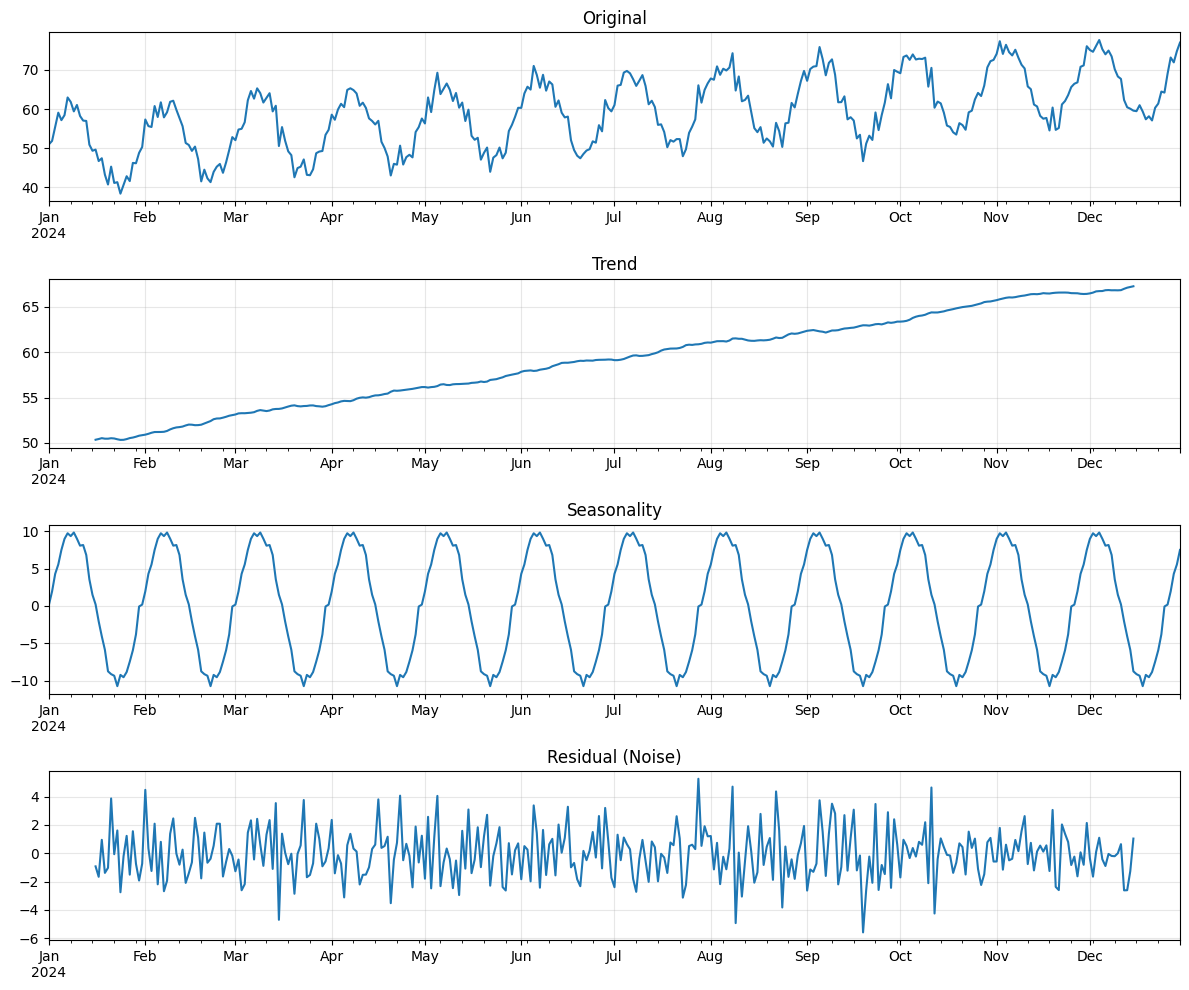

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Create time series with trend and seasonality
np.random.seed(42)
t = np.arange(365)
trend = 0.05 * t
seasonality = 10 * np.sin(2 * np.pi * t / 30)  # 30-day cycle
noise = np.random.normal(0, 2, 365)
ts = trend + seasonality + noise + 50

# Create time series object
ts_series = pd.Series(ts, index=pd.date_range('2024-01-01', periods=365))

# Decompose
decomposition = seasonal_decompose(ts_series, model='additive', period=30)

print(f"Original: Mean = {ts_series.mean():.2f}, Std = {ts_series.std():.2f}")
print(f"Trend: Increases from {decomposition.trend.dropna().iloc[0]:.2f} to {decomposition.trend.dropna().iloc[-1]:.2f}")
print(f"Seasonality: Range = {decomposition.seasonal.max() - decomposition.seasonal.min():.2f}")
print(f"Residual: Std = {decomposition.resid.dropna().std():.2f}")

# Plot
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

decomposition.observed.plot(ax=axes[0], title='Original')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonality')
decomposition.resid.plot(ax=axes[3], title='Residual (Noise)')

for ax in axes:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2.1.3 Scatter Plots for Spatial Data

**Spatial data** consists of measurements with geographic coordinates (latitude, longitude).

### Basic Scatter Plot

Total earthquakes: 200
Magnitude range: 1.02 to 17.34
Mean magnitude: 3.30
Earthquakes > 5.0: 39


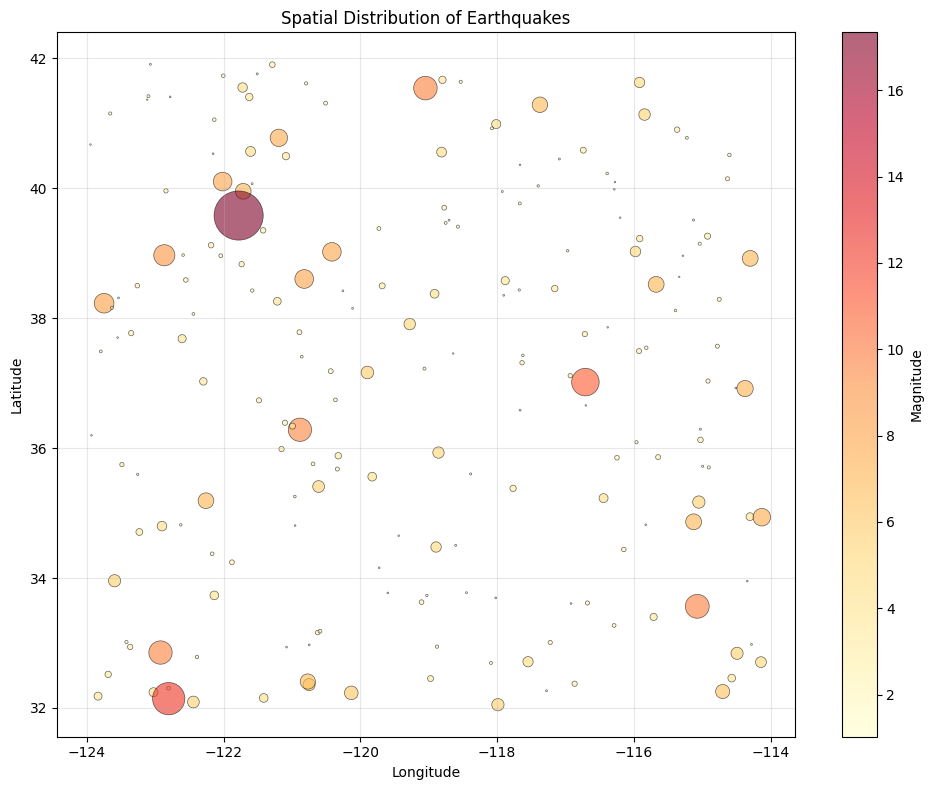

In [12]:
# Simulated spatial data (e.g., earthquake locations)
np.random.seed(42)
n_points = 200

# Coordinates (roughly California-like)
longitudes = np.random.uniform(-124, -114, n_points)
latitudes = np.random.uniform(32, 42, n_points)

# Magnitudes
magnitudes = np.random.exponential(2, n_points) + 1

print(f"Total earthquakes: {n_points}")
print(f"Magnitude range: {magnitudes.min():.2f} to {magnitudes.max():.2f}")
print(f"Mean magnitude: {magnitudes.mean():.2f}")
print(f"Earthquakes > 5.0: {np.sum(magnitudes > 5.0)}")

plt.figure(figsize=(10, 8))
plt.scatter(longitudes, latitudes, s=magnitudes**2.5, 
            c=magnitudes, cmap='YlOrRd', alpha=0.6, 
            edgecolors='black', linewidths=0.5)

plt.colorbar(label='Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Earthquakes')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Density range: 0.004045 to 0.011608
High-density regions (top 10%): 20 points


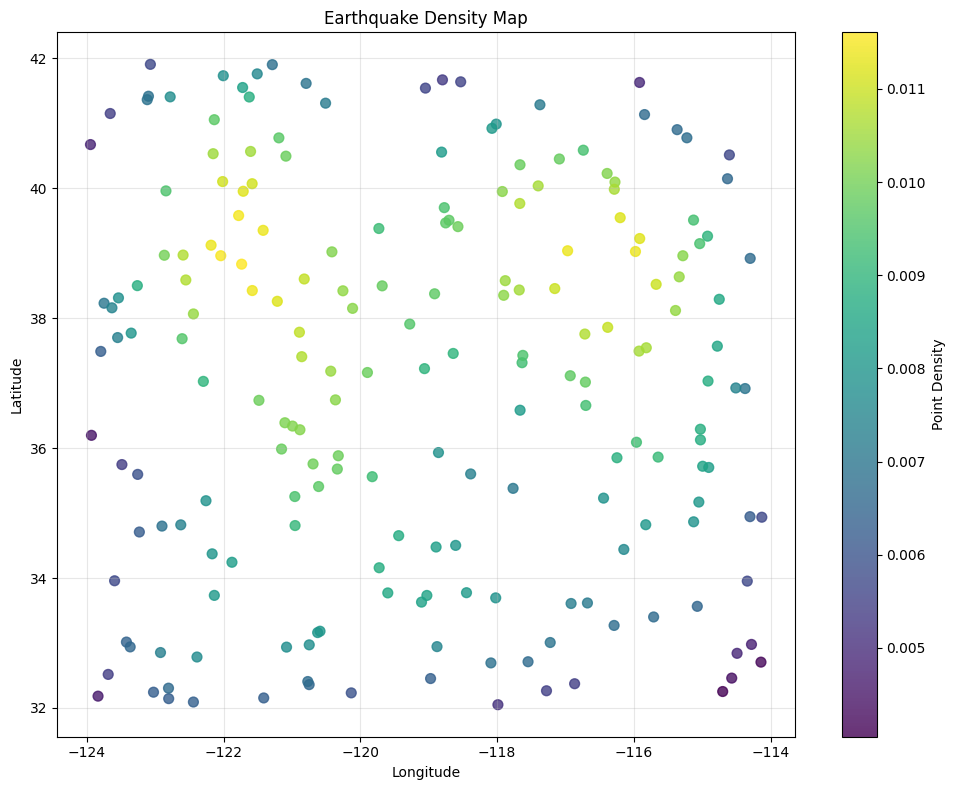

In [13]:
from scipy.stats import gaussian_kde

# Calculate point density
xy = np.vstack([longitudes, latitudes])
z = gaussian_kde(xy)(xy)

print(f"Density range: {z.min():.6f} to {z.max():.6f}")
print(f"High-density regions (top 10%): {np.sum(z > np.percentile(z, 90))} points")

# Sort by density (plot high density on top)
idx = z.argsort()
longitudes_sorted = longitudes[idx]
latitudes_sorted = latitudes[idx]
z_sorted = z[idx]

plt.figure(figsize=(10, 8))
scatter = plt.scatter(longitudes_sorted, latitudes_sorted, 
                     c=z_sorted, s=50, cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label='Point Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake Density Map')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Correlation: r = 0.636
X (height): Mean = 169.0 cm, Std = 9.0 cm
Y (weight): Mean = 84.6 kg, Std = 6.1 kg


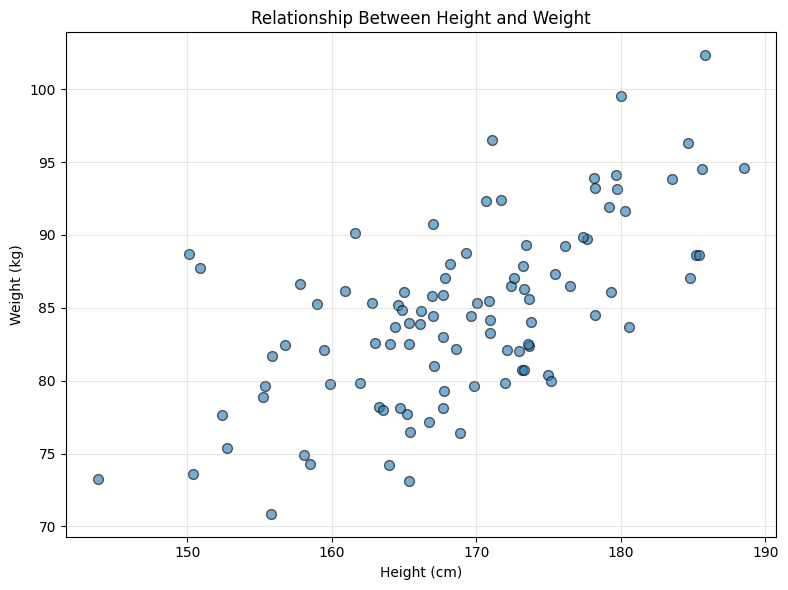

In [14]:
# Generate correlated data
np.random.seed(42)
n = 100

x = np.random.normal(170, 10, n)  # Heights
y = 0.5 * x + np.random.normal(0, 5, n)  # Weights (correlated)

corr = np.corrcoef(x, y)[0, 1]
print(f"Correlation: r = {corr:.3f}")
print(f"X (height): Mean = {x.mean():.1f} cm, Std = {x.std():.1f} cm")
print(f"Y (weight): Mean = {y.mean():.1f} kg, Std = {y.std():.1f} kg")

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, s=50, edgecolors='black')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Relationship Between Height and Weight')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Regression equation: y = 0.43x + 12.21
R-squared: 0.404
P-value: 1.20e-12


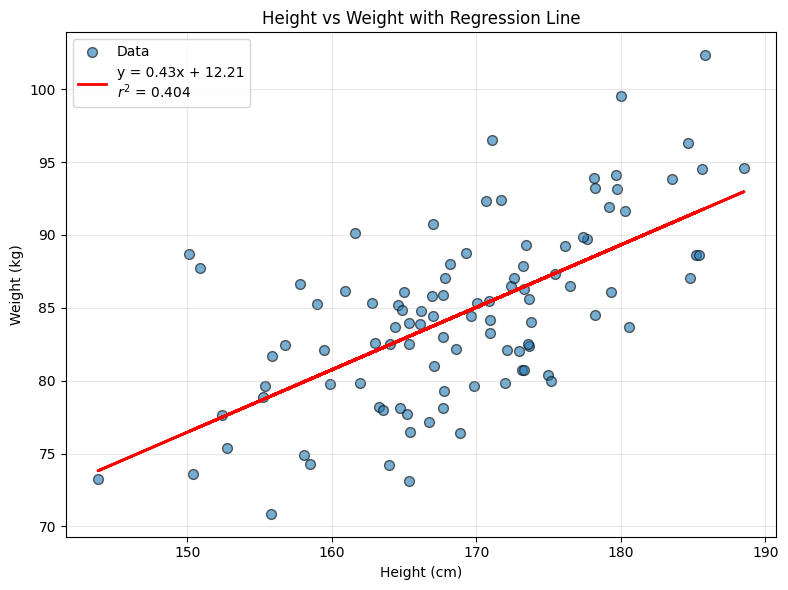

In [15]:
# Add regression line
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept

print(f"Regression equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"P-value: {p_value:.2e}")

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, s=50, edgecolors='black', label='Data')
plt.plot(x, line, 'r-', linewidth=2, 
         label=f'y = {slope:.2f}x + {intercept:.2f}\n$r^2$ = {r_value**2:.3f}')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight with Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Males: 44
Females: 56


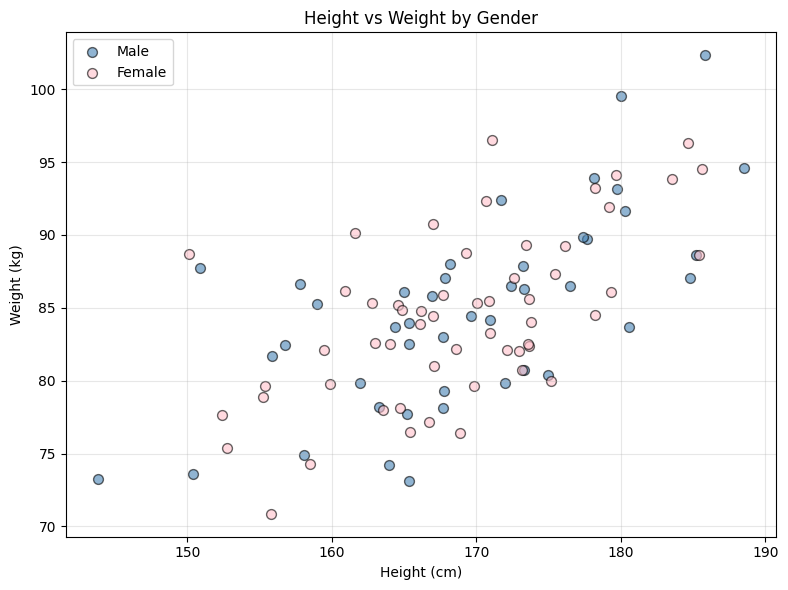

In [16]:
# Add categorical variable (e.g., gender)
np.random.seed(42)
gender = np.random.choice(['Male', 'Female'], n)

colors = ['steelblue' if g == 'Male' else 'pink' for g in gender]

print(f"Males: {np.sum(gender == 'Male')}")
print(f"Females: {np.sum(gender == 'Female')}")

plt.figure(figsize=(8, 6))
for g, color, label in [('Male', 'steelblue', 'Male'), 
                         ('Female', 'pink', 'Female')]:
    mask = gender == g
    plt.scatter(x[mask], y[mask], alpha=0.6, s=50, 
                c=color, edgecolors='black', label=label)

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight by Gender')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Pattern correlations:
  Strong Positive: r = 0.97
  Weak Positive: r = 0.35
  Strong Negative: r = -0.96
  No Correlation: r = -0.11


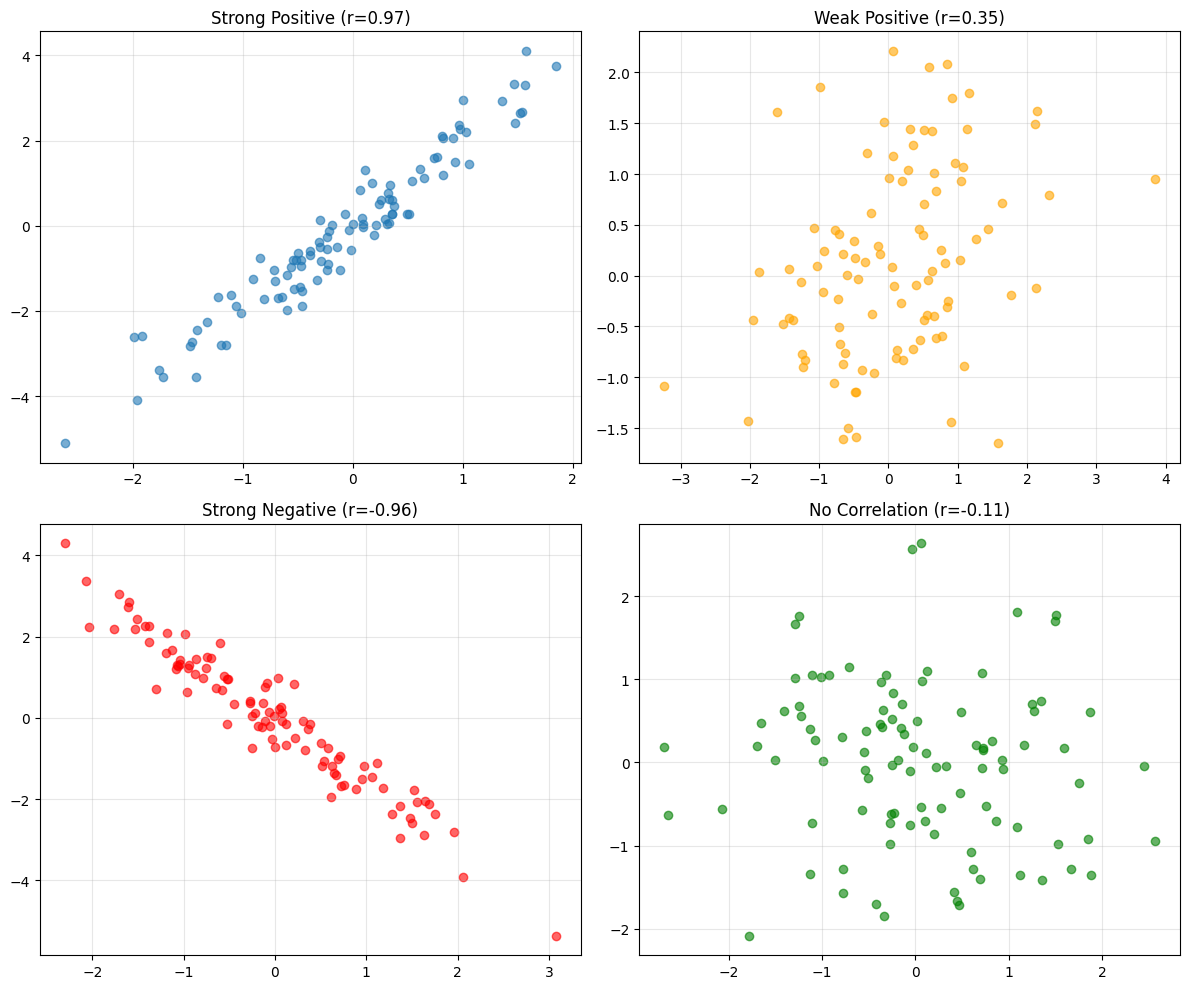

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
np.random.seed(42)
n = 100

# 1. Strong positive correlation
x1 = np.random.randn(n)
y1 = 2 * x1 + np.random.randn(n) * 0.5
r1 = np.corrcoef(x1, y1)[0,1]
axes[0, 0].scatter(x1, y1, alpha=0.6)
axes[0, 0].set_title(f'Strong Positive (r={r1:.2f})')
axes[0, 0].grid(True, alpha=0.3)

# 2. Weak positive correlation
x2 = np.random.randn(n)
y2 = 0.3 * x2 + np.random.randn(n)
r2 = np.corrcoef(x2, y2)[0,1]
axes[0, 1].scatter(x2, y2, alpha=0.6, color='orange')
axes[0, 1].set_title(f'Weak Positive (r={r2:.2f})')
axes[0, 1].grid(True, alpha=0.3)

# 3. Strong negative correlation
x3 = np.random.randn(n)
y3 = -1.5 * x3 + np.random.randn(n) * 0.5
r3 = np.corrcoef(x3, y3)[0,1]
axes[1, 0].scatter(x3, y3, alpha=0.6, color='red')
axes[1, 0].set_title(f'Strong Negative (r={r3:.2f})')
axes[1, 0].grid(True, alpha=0.3)

# 4. No correlation
x4 = np.random.randn(n)
y4 = np.random.randn(n)
r4 = np.corrcoef(x4, y4)[0,1]
axes[1, 1].scatter(x4, y4, alpha=0.6, color='green')
axes[1, 1].set_title(f'No Correlation (r={r4:.2f})')
axes[1, 1].grid(True, alpha=0.3)

print(f"Pattern correlations:")
print(f"  Strong Positive: r = {r1:.2f}")
print(f"  Weak Positive: r = {r2:.2f}")
print(f"  Strong Negative: r = {r3:.2f}")
print(f"  No Correlation: r = {r4:.2f}")

plt.tight_layout()
plt.show()

Data summary:
  Heights: 150 - 189 cm
  Weights: 69 - 96 kg
  Ages: 18 - 61 years
  Correlation (height-weight): r = 0.764


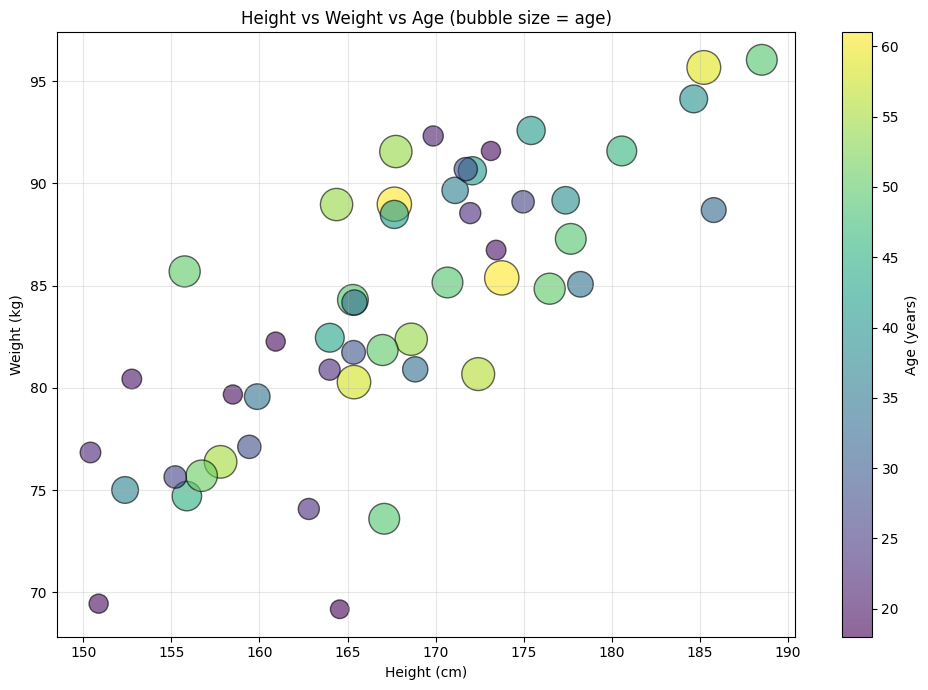

In [18]:
# Bubble chart example
np.random.seed(42)
n = 50

heights = np.random.normal(170, 10, n)
weights = 0.5 * heights + np.random.normal(0, 5, n)
ages = np.random.randint(18, 65, n)

print(f"Data summary:")
print(f"  Heights: {heights.min():.0f} - {heights.max():.0f} cm")
print(f"  Weights: {weights.min():.0f} - {weights.max():.0f} kg")
print(f"  Ages: {ages.min()} - {ages.max()} years")
print(f"  Correlation (height-weight): r = {np.corrcoef(heights, weights)[0,1]:.3f}")

plt.figure(figsize=(10, 7))
scatter = plt.scatter(heights, weights, s=ages*10, 
                     c=ages, cmap='viridis', alpha=0.6, 
                     edgecolors='black', linewidths=1)
plt.colorbar(scatter, label='Age (years)')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight vs Age (bubble size = age)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()